In [1]:
%env CUDA_VISIBLE_DEVICES=2

env: CUDA_VISIBLE_DEVICES=2


In [2]:
import torchvision.models as models
import torch
import torch.nn as nn
import medvqa
from importlib import reload

In [3]:
densenet = models.densenet121(pretrained=False)

In [19]:
path = "/home/pdpino/workspace-medical-ai/public_checkpoints/cls-0321_052008_chexpert_densenet-121-v2_drop0.3_labels13_normS_wd1e-05_size256_lr0.0001_sch-roc_auc-p3-f0.5_shuffle.pt"
checkpoint = torch.load(path, map_location='cuda')

In [30]:
del checkpoint["prediction.weight"]
del checkpoint["prediction.bias"]

In [27]:
densenet.classifier = None

In [31]:
densenet.load_state_dict(checkpoint)

<All keys matched successfully>

In [5]:
BS = 5 # batch_size
images = torch.rand(BS, 3, 256, 256)

In [8]:
densenet(images).shape

torch.Size([5, 1000])

In [12]:
image_encoder = nn.Sequential(*list(densenet.children())[:-1])

In [9]:
densenet.features(images).shape

torch.Size([5, 1024, 8, 8])

In [13]:
image_encoder(images).shape

torch.Size([5, 1024, 8, 8])

In [1]:
from medvqa.datasets.medical_tags_extractor import MedicalTagsExtractor

In [2]:
med_tags_extractor = MedicalTagsExtractor('medical_terms_frequency__20220317_145545.pkl')

In [4]:
_text = 'small right and moderate left pleural effusions are improving revealing stable moderate size consolidation at the right lung base that could be atelectasis or pneumonia and improved left lower lobe atelectasis. Heart is probably moderately enlarged so substantially obscured by pleural effusion and atelectasis'
list1 = med_tags_extractor.extract_tags(_text)
list2 = [med_tags_extractor.tags[x] for x in med_tags_extractor.extract_tag_ids(_text)]
assert sorted(list1) == sorted(list2)
print(list1)
print(list2)

['lung', 'obscured', 'effusion', 'consolidation', 'pneumonia', 'base', 'moderate', 'size', 'atelectasis', 'heart', 'lobe', 'small', 'right', 'enlarged', 'left', 'pleural', 'lower']
['lung', 'obscured', 'effusion', 'consolidation', 'pneumonia', 'base', 'moderate', 'size', 'atelectasis', 'heart', 'lobe', 'small', 'right', 'enlarged', 'left', 'pleural', 'lower']


In [5]:
len(med_tags_extractor.tags)

1956

In [9]:
from sklearn.metrics import accuracy_score

In [26]:
torch.rand(9) - 0.5

tensor([-0.0922,  0.4901,  0.0535,  0.0776, -0.3434, -0.2360, -0.4179,  0.2466,
        -0.3487])

In [8]:
f1_score([1,1,1,0,0,0,0,0,0], (torch.rand(9) - 0.5) > 0)

0.28571428571428575

In [4]:
from medvqa.metrics.classification.multilabel_f1score import f1_score

In [12]:
accuracy_score([0,0,0,1], [0,1,0,1])

0.75

In [19]:
(torch.rand(5, 10).detach() > 0) == 1

tensor([[True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True]])

In [39]:
from sklearn.preprocessing import MultiLabelBinarizer

In [45]:
aux = [[1], [2,4]]

[[1], [2, 4]]

In [62]:
x = MultiLabelBinarizer(list(range(10))).fit_transform([[1], [0, 0, 0, 0, 5]])

In [63]:
x

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0]])

In [57]:
x

<2x10 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [9]:
type("asfasdf") is list

False

In [1]:
from medvqa.datasets.mimiccxr.mimiccxr_vqa_dataset_management import MIMICCXR_VQA_Trainer

In [11]:
tokenizer = Tokenizer(qa_adapted_filenames=[iuxray_qa_adapted_reports_filename,
                                                mimiccxr_qa_adapted_reports_filename],
                          qa_adapted_datasets=[iuxray_qa_reports, mimiccxr_qa_reports],
                          min_freq=vocab_min_freq)
mvt = MIMICCXR_VQA_Trainer()

In [21]:
x = torch.rand([])
print(hasattr(x, '__len__'))
type(x) is torch.Tensor

True


True

In [22]:
import numbers

In [26]:
isinstance(x.item(), numbers.Number)

True

In [35]:
isinstance((x == x).item(), numbers.Number)

True

In [33]:
type(y)

int

In [18]:
x = {'asdf': 23, 'sdfsd':3, 'aaaa': 55, 'zzz':555}
vals = tuple(x[k] for k in sorted(list(x.keys())))
f'{vals}'

'(55, 23, 3, 555)'

In [21]:
from medvqa.utils.files import load_json_file
from medvqa.datasets.iuxray import IUXRAY_CACHE_DIR
import os

In [22]:
iuxray_reports = load_json_file(os.path.join(IUXRAY_CACHE_DIR, 'qa_adapted_reports__20220324_143133.json'))

In [24]:
iuxray_reports['questions'][69]

'pneumatocele?'

In [8]:
reload(medvqa.models.vqa)

<module 'medvqa.models.vqa' from '/home/pamessina/medvqa/medvqa/models/vqa/__init__.py'>

In [9]:
from medvqa.models.vqa import ImageQuestionClassifier

In [10]:
image_question_classifier = ImageQuestionClassifier(1024, 97)

In [11]:
checkpoint = torch.load('/home/pamessina/medvqa-workspace/models/vqa/20220508_110803_mimiccxr+iuxray_oevqa(densenet121+bilstm+lstm)_voc-minf=5_model-args=(128,128,512,2,128,1024,0)_cnn-pretr=0_mim-iux-freqs=200,10_medtok=1_tags=0_orien=1_chx=1_ql=1_use_amp/checkpoint_194_emq+cD+wmdcmp+oracc+chxlf1+qlf1=0.6855.pt')

In [16]:
image_question_classifier.load_state_dict(checkpoint['model'], strict=False)

_IncompatibleKeys(missing_keys=[], unexpected_keys=['embedding_table.weight', 'question_encoder.embedding_table.weight', 'question_encoder.lstm.weight_ih_l0', 'question_encoder.lstm.weight_hh_l0', 'question_encoder.lstm.bias_ih_l0', 'question_encoder.lstm.bias_hh_l0', 'question_encoder.lstm.weight_ih_l0_reverse', 'question_encoder.lstm.weight_hh_l0_reverse', 'question_encoder.lstm.bias_ih_l0_reverse', 'question_encoder.lstm.bias_hh_l0_reverse', 'question_encoder.W_out.weight', 'question_encoder.W_out.bias', 'question_decoder.start_idx', 'question_decoder.embedding_table.weight', 'question_decoder.lstm_cell.weight_ih', 'question_decoder.lstm_cell.weight_hh', 'question_decoder.lstm_cell.bias_ih', 'question_decoder.lstm_cell.bias_hh', 'question_decoder.W_o.weight', 'question_decoder.W_o.bias', 'question_decoder.W_h.weight', 'question_decoder.W_h.bias', 'question_decoder.W_c.weight', 'question_decoder.W_c.bias', 'question_decoder.W_vocab.weight', 'question_decoder.W_vocab.bias', 'answer_de

In [19]:
batch_size = 6
vocab_size = 10
k = 3

In [59]:
def expand_tensor_for_beamsearch(x, k=3):
    x = x.unsqueeze(1)
    expanded_shape = list(x.shape)
    expanded_shape[1] = k
    final_shape = (-1, *expanded_shape[2:])
    x = x.expand(expanded_shape).reshape(final_shape)
    return x

In [74]:
y = torch.rand((batch_size,2,2))

In [66]:
y.shape

torch.Size([6])

In [67]:
yy = expand_tensor_for_beamsearch(y, 3)

In [68]:
yy.shape

torch.Size([18])

In [69]:
yy

tensor([0.7631, 0.7631, 0.7631, 0.6812, 0.6812, 0.6812, 0.1418, 0.1418, 0.1418,
        0.6295, 0.6295, 0.6295, 0.7533, 0.7533, 0.7533, 0.8059, 0.8059, 0.8059])

In [33]:
y.view(-1, 1).expand((-1, 3)).reshape(-1)

tensor([0.5277, 0.5277, 0.5277, 0.5786, 0.5786, 0.5786, 0.3248, 0.3248, 0.3248,
        0.7825, 0.7825, 0.7825, 0.1196, 0.1196, 0.1196, 0.2675, 0.2675, 0.2675])

In [77]:
x = torch.rand((batch_size * k, vocab_size))

In [78]:
x.shape

torch.Size([18, 10])

In [79]:
next_topk = x.topk(3)

In [80]:
next_topk.values.shape

torch.Size([18, 3])

In [83]:
next_topk.values

tensor([[0.9615, 0.7342, 0.7289],
        [0.7679, 0.7453, 0.6772],
        [0.9683, 0.9119, 0.8841],
        [0.6275, 0.6149, 0.5978],
        [0.9538, 0.9323, 0.8339],
        [0.9604, 0.9191, 0.8751],
        [0.9534, 0.9025, 0.7567],
        [0.9223, 0.8865, 0.7758],
        [0.7818, 0.6555, 0.5447],
        [0.9999, 0.8322, 0.7741],
        [0.8682, 0.7486, 0.6980],
        [0.9704, 0.8717, 0.7842],
        [0.9834, 0.9494, 0.9206],
        [0.9605, 0.9173, 0.8819],
        [0.9625, 0.9216, 0.6936],
        [0.9250, 0.8615, 0.7895],
        [0.9633, 0.9026, 0.8803],
        [0.9792, 0.6997, 0.6621]])

In [100]:
next_topk.indices.dtype
torch.zeros((2,2), dtype=int)

tensor([[0, 0],
        [0, 0]])

In [76]:
top_k = y.topk(3)

RuntimeError: selected index k out of range

In [88]:
1 + torch.log(top_k.values[0][0])

tensor(0.9735)

In [90]:
x.clone()

tensor([[0.5606, 0.1659, 0.1629, 0.1728, 0.3895, 0.7289, 0.2209, 0.5765, 0.9615,
         0.7342],
        [0.1508, 0.0255, 0.2021, 0.4179, 0.3990, 0.6003, 0.7679, 0.1248, 0.7453,
         0.6772],
        [0.8841, 0.2324, 0.6177, 0.0073, 0.4803, 0.9119, 0.9683, 0.0910, 0.1812,
         0.7829],
        [0.4662, 0.0948, 0.1873, 0.2887, 0.6149, 0.0134, 0.5978, 0.6275, 0.4856,
         0.4884],
        [0.0216, 0.7627, 0.9323, 0.7105, 0.9538, 0.2230, 0.3695, 0.8339, 0.5819,
         0.6050],
        [0.1597, 0.8483, 0.9604, 0.1341, 0.1380, 0.8751, 0.2443, 0.6905, 0.7692,
         0.9191],
        [0.1655, 0.6862, 0.7442, 0.7567, 0.9025, 0.5976, 0.0313, 0.6703, 0.1105,
         0.9534],
        [0.9223, 0.1618, 0.7278, 0.1070, 0.3003, 0.8865, 0.3092, 0.7758, 0.0682,
         0.6432],
        [0.7818, 0.2490, 0.3800, 0.5447, 0.0992, 0.1432, 0.1930, 0.6555, 0.1866,
         0.1581],
        [0.9999, 0.4593, 0.6465, 0.8322, 0.1118, 0.3830, 0.3434, 0.7741, 0.7548,
         0.0706],
        [0

In [73]:
top_k.values.shape

torch.Size([18, 3])

In [13]:
torch.log(top_k.values)

tensor([[-0.0387, -0.0631, -0.0649],
        [-0.0310, -0.0430, -0.0625],
        [-0.0460, -0.0485, -0.1475],
        [-0.0859, -0.1304, -0.1547],
        [-0.0399, -0.1235, -0.1504],
        [-0.0206, -0.0722, -0.0846],
        [-0.0070, -0.0371, -0.2323],
        [-0.0062, -0.0300, -0.0804],
        [-0.1127, -0.1605, -0.1654],
        [-0.0186, -0.0257, -0.0407]])

In [17]:
x.view(5,-1).shape

torch.Size([5, 40])

In [15]:
torch.topk(x.view(5,-1), 3)

torch.return_types.topk(
values=tensor([[0.9695, 0.9620, 0.9579],
        [0.9550, 0.9526, 0.9177],
        [0.9796, 0.9609, 0.9304],
        [0.9938, 0.9930, 0.9705],
        [0.9815, 0.9747, 0.9601]]),
indices=tensor([[39, 10, 24],
        [ 3,  4, 20],
        [21, 17, 26],
        [29,  4, 27],
        [24, 23, 26]]))

In [14]:
from importlib import reload

In [259]:
import medvqa
from medvqa.models.vqa.answer_decoder import AnswerDecoder

In [258]:
reload(medvqa.models.vqa.answer_decoder)

<module 'medvqa.models.vqa.answer_decoder' from '/home/pamessina/medvqa/medvqa/models/vqa/answer_decoder.py'>

In [265]:
embedding_table = nn.Embedding(10, 100, 0)

In [266]:
answer_decoder = AnswerDecoder(
    embedding_table=embedding_table,
    image_local_feat_size=100,
    question_vec_size=100,
    embed_size=100,
    hidden_size=100,
    n_lstm_layers=3,
    start_idx=1,
    vocab_size=10,
    dropout_prob=0,
    padding_idx=0,
    eos_idx=2,
)

In [267]:
batch_size = 5

In [268]:
image_local_feat = torch.rand((batch_size, 16, 100))
image_global_feat = torch.rand((batch_size, 200))
question_vecs = torch.rand((batch_size, 100))

In [273]:
with torch.set_grad_enabled(False):
    answer_decoder.train(False)
    beam_output = answer_decoder.beam_search_decoding(
        image_local_feat,
        image_global_feat,
        question_vecs,
        max_answer_length=10,
        k=4,
    )


****** t = 0


ki = 0
topk_list[ki]:
torch.return_types.topk(
values=tensor([[0.1352, 0.1148, 0.1123, 0.1088],
        [0.1300, 0.1137, 0.1131, 0.1081],
        [0.1302, 0.1159, 0.1153, 0.1084],
        [0.1318, 0.1170, 0.1128, 0.1121],
        [0.1371, 0.1168, 0.1163, 0.1087]]),
indices=tensor([[4, 8, 3, 5],
        [4, 3, 8, 5],
        [4, 8, 3, 5],
        [4, 8, 5, 3],
        [4, 3, 8, 5]]))
output_list[ki]:
tensor([[4, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [4, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [4, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [4, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [4, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
EOS_found[ki]:
[False, False, False, False, False]
log_prob_sums[ki]:
tensor([-2.0008, -2.0406, -2.0385, -2.0264, -1.9869], dtype=torch.float64)

ki = 1
topk_list[ki]:
None
output_list[ki]:
tensor([[8, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [8, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [8, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [3, 0, 0, 0, 0, 0, 0, 

In [270]:
with torch.set_grad_enabled(False):
    answer_decoder.train(False)
    greedy_output = answer_decoder.greedy_search_decoding(
        image_local_feat,
        image_global_feat,
        question_vecs,
        max_answer_length=10,
    )

In [271]:
greedy_output

tensor([[4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4]])

In [274]:
beam_output

([tensor([[4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
          [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
          [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
          [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
          [4, 4, 4, 4, 4, 4, 4, 4, 4, 4]]),
  tensor([[4, 4, 4, 4, 4, 4, 8, 4, 4, 4],
          [4, 4, 8, 4, 4, 4, 4, 4, 4, 4],
          [4, 4, 4, 4, 4, 4, 4, 4, 4, 8],
          [8, 4, 4, 4, 4, 4, 4, 4, 4, 4],
          [4, 4, 4, 4, 8, 4, 4, 4, 4, 4]]),
  tensor([[4, 4, 4, 4, 4, 4, 4, 4, 4, 8],
          [4, 4, 4, 8, 4, 4, 4, 4, 4, 4],
          [4, 4, 4, 4, 4, 4, 8, 4, 4, 4],
          [4, 8, 4, 4, 4, 4, 4, 4, 4, 4],
          [4, 4, 4, 4, 4, 8, 4, 4, 4, 4]]),
  tensor([[4, 4, 4, 4, 4, 4, 4, 8, 4, 4],
          [4, 4, 4, 4, 8, 4, 4, 4, 4, 4],
          [4, 4, 4, 4, 4, 4, 4, 4, 8, 4],
          [4, 4, 4, 4, 4, 4, 4, 4, 4, 8],
          [4, 4, 4, 4, 4, 4, 8, 4, 4, 4]])],
 tensor([[-20.2271, -20.4618, -20.4155, -20.2728, -19.8868],
         [-20.3546, -20.5860, -20.5274, -20.3917, -20.0346],
         [-20.3546, -20.5867,

In [133]:
_x = torch.rand(5,5)
_x2 = _x.clone()

In [134]:
_x

tensor([[0.3948, 0.3327, 0.8307, 0.0634, 0.0054],
        [0.5373, 0.1518, 0.4682, 0.9005, 0.4235],
        [0.1074, 0.0699, 0.9498, 0.1834, 0.1292],
        [0.2304, 0.8344, 0.1235, 0.1750, 0.2598],
        [0.5720, 0.6804, 0.6465, 0.0694, 0.9396]])

In [136]:
_x2[0][0] += 5

In [182]:
_x2

tensor([[1.5395e+01, 3.3272e-01, 8.3066e-01, 6.3414e-02, 5.4101e-03],
        [5.3727e-01, 1.5181e-01, 4.6817e-01, 9.0047e-01, 4.2347e-01],
        [1.0737e-01, 6.9916e-02, 9.4979e-01, 1.8339e-01, 1.2918e-01],
        [2.3036e-01, 8.3443e-01, 1.2347e-01, 1.7497e-01, 2.5978e-01],
        [5.7201e-01, 6.8044e-01, 6.4649e-01, 6.9358e-02, 9.3962e-01]])

In [183]:
_aux = _x2[0][0]

In [185]:
_aux = _aux + 10

In [186]:
_aux, _x2

(tensor(25.3948),
 tensor([[1.5395e+01, 3.3272e-01, 8.3066e-01, 6.3414e-02, 5.4101e-03],
         [5.3727e-01, 1.5181e-01, 4.6817e-01, 9.0047e-01, 4.2347e-01],
         [1.0737e-01, 6.9916e-02, 9.4979e-01, 1.8339e-01, 1.2918e-01],
         [2.3036e-01, 8.3443e-01, 1.2347e-01, 1.7497e-01, 2.5978e-01],
         [5.7201e-01, 6.8044e-01, 6.4649e-01, 6.9358e-02, 9.3962e-01]]))

In [174]:
torch.log(torch.tensor(0.0000000000001)) + 5

tensor(-24.9336)

In [278]:
','.join(f'{s:.5f}' if s is not None else '' for s in [1,2,3,None,4,4,None])

'1.00000,2.00000,3.00000,,4.00000,4.00000,'

In [280]:
from sklearn.metrics import roc_auc_score
import numpy as np

In [301]:
labels = np.random.randint(0, 2, (10, 5))
# labels[:, 0] = 0
scores = np.random.rand(10, 5)
labels, scores

(array([[0, 0, 1, 0, 1],
        [0, 0, 1, 0, 1],
        [1, 1, 0, 1, 0],
        [1, 0, 0, 1, 0],
        [0, 0, 0, 1, 0],
        [1, 0, 0, 0, 1],
        [0, 1, 1, 1, 1],
        [0, 1, 1, 0, 0],
        [0, 1, 1, 0, 1],
        [1, 0, 1, 1, 1]]),
 array([[0.13655995, 0.58067257, 0.4758888 , 0.01857358, 0.90228371],
        [0.14327247, 0.99197391, 0.37433684, 0.81784944, 0.31000734],
        [0.30670386, 0.8831272 , 0.38707029, 0.02805834, 0.20474047],
        [0.84755107, 0.20126986, 0.93645088, 0.92002467, 0.4051819 ],
        [0.01372999, 0.12910772, 0.59537521, 0.18069637, 0.15656574],
        [0.81544862, 0.84454266, 0.81466468, 0.0823764 , 0.10051308],
        [0.22296433, 0.64325898, 0.87730709, 0.68973472, 0.94932946],
        [0.80919735, 0.68117015, 0.01128755, 0.78992126, 0.42008587],
        [0.70502539, 0.19442073, 0.55524255, 0.05112857, 0.47034507],
        [0.35802589, 0.86911532, 0.1968217 , 0.58394408, 0.11611865]]))

In [293]:
labels.tolist()

[[0, 1, 0, 0, 1],
 [0, 1, 0, 0, 1],
 [1, 0, 0, 0, 1],
 [1, 1, 1, 1, 1],
 [0, 0, 1, 1, 1],
 [1, 1, 0, 0, 1],
 [1, 0, 1, 1, 0],
 [1, 0, 0, 1, 1],
 [0, 1, 1, 1, 1],
 [1, 1, 1, 1, 1]]

In [302]:
roc_auc_score(labels.tolist(), scores.tolist(), average=None, )

array([0.83333333, 0.5       , 0.20833333, 0.6       , 0.58333333])

In [295]:
import random

In [296]:
random.random()

0.4643210768973631

In [310]:
bce = nn.BCEWithLogitsLoss(reduction='none')

In [351]:
_output = torch.randn((20, 6))
_target = torch.empty((20, 6)).random_(2)
# _output, _target

In [323]:
loss = bce(_output, _target)
loss

tensor([[0.5118, 1.4194, 0.4911, 0.5084, 0.3416, 1.6968],
        [1.3920, 0.3531, 0.6241, 2.0380, 1.3193, 0.9906],
        [0.7879, 0.4139, 0.3359, 0.7290, 0.6034, 1.2483],
        [0.4240, 0.6391, 0.6337, 0.3318, 0.9897, 1.0377],
        [0.2391, 1.5802, 0.4641, 0.8932, 0.3398, 0.7600]])

In [336]:
positive = _target.sum(0)
negative = (1 - _target).sum(0)
total = positive + negative
positive, negative, total

(tensor([3., 1., 2., 1., 5., 3.]),
 tensor([2., 4., 3., 4., 0., 2.]),
 tensor([5., 5., 5., 5., 5., 5.]))

In [337]:
positive / 5

tensor([0.6000, 0.2000, 0.4000, 0.2000, 1.0000, 0.6000])

In [339]:
BP = (negative / total).clamp_(0.3, 0.7)
BN = positive / total
BP, BN

(tensor([0.4000, 0.7000, 0.6000, 0.7000, 0.3000, 0.4000]),
 tensor([0.6000, 0.2000, 0.4000, 0.2000, 1.0000, 0.6000]))

In [340]:
BP.clamp()

tensor([0.4000, 0.7000, 0.6000, 0.7000, 0.3000, 0.4000])

In [338]:
((_target * BP + (1 - _target) * BN) * loss).mean()

tensor(0.2671)

In [328]:
-BP * _target * torch.log(torch.sigmoid(_output)) - BN * (1 - _target) * torch.log(1 - torch.sigmoid(_output))

tensor([[0.2047, 0.2839, 0.2947, 0.1017, 0.0000, 0.6787],
        [0.5568, 0.0706, 0.2496, 0.4076, 0.0000, 0.3962],
        [0.4727, 0.3311, 0.1343, 0.1458, 0.0000, 0.4993],
        [0.2544, 0.1278, 0.2535, 0.0664, 0.0000, 0.6226],
        [0.0956, 0.3160, 0.2784, 0.7146, 0.0000, 0.4560]])

In [313]:
torch.randn(3)

tensor([1.5144, 0.4718, 0.3493])

In [312]:
target = torch.empty(3).random_(2)
target

tensor([0., 0., 1.])

In [366]:
class WeigthedBCEByClassLoss(nn.Module):
    def __init__(self, epsilon=1e-7):
        super().__init__()
        self.bce = nn.BCEWithLogitsLoss(reduction='none')
        self.epsilon = epsilon

    def forward(self, output, target):
        target = target.float()
        not_target = 1 - target
        positive = target.sum(0)
        negative = not_target.sum(0)
        total = target.size(0)
        pos_weight = negative / positive.clamp(1, total)
        neg_weight = positive / negative.clamp(1, total)
        pos_weight.clamp_(1, total * 0.3)
        neg_weight.clamp_(1, total * 0.3)
        print(pos_weight, neg_weight)
        # weight_sum = pos_weight + neg_weight
        # pos_weight = pos_weight / weight_sum
        # neg_weight = neg_weight / weight_sum
        loss = (target * pos_weight + not_target * neg_weight) * self.bce(output, target)
        return loss.mean()

In [367]:
wbce = WeigthedBCEByClassLoss()

In [357]:
wbce(_output, _target)

tensor([1.0000, 1.0000, 1.0000, 1.8571, 1.2222, 2.3333]) tensor([1.2222, 1.2222, 1.8571, 1.0000, 1.0000, 1.0000])


tensor(0.8510)

In [368]:
wbce(_output, _target)

tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000]) tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000])


tensor(0.1415)

In [1]:
from medvqa.utils.files import load_json_file
from medvqa.datasets.mimiccxr import MIMICCXR_CACHE_DIR
from medvqa.datasets.iuxray import IUXRAY_CACHE_DIR
from medvqa.datasets.tokenizer import Tokenizer

import random
import os

In [2]:
reports = load_json_file(os.path.join(MIMICCXR_CACHE_DIR, 'qa_adapted_reports__20220904_095810.json'))

In [3]:
reports_ = load_json_file(os.path.join(IUXRAY_CACHE_DIR, 'qa_adapted_reports__20220904_091601.json'))

In [4]:
tokenizer = Tokenizer([
    os.path.join(MIMICCXR_CACHE_DIR, 'qa_adapted_reports__20220904_095810.json'),
    os.path.join(IUXRAY_CACHE_DIR, 'qa_adapted_reports__20220904_091601.json'),
], mode='report', min_freq=10, medical_terms_frequency_filename='medical_terms_frequency__20220904_105617.pkl',
    overwrite=True)

1427203it [00:08, 176284.83it/s]

Vocabulary saved to /home/pamessina/medvqa-workspace/cache/vocab__min_freq=10__mode=report__from(qa_adapted_reports__20220904_095810.json;qa_adapted_reports__20220904_091601.json).pkl


In [6]:
tokenizer.vocab_size

4838

In [7]:
reports['reports'][0]

{'sentences': ['Heart size is normal',
  'There are mild aortic knob calcifications',
  'Cardiomediastinal silhouette and hilar contours are otherwise unremarkable',
  'Lungs are clear',
  'Pleural surfaces are clear without effusion or pneumothorax',
  'No acute cardiopulmonary abnormality'],
 'invalid': [],
 'unmatched': [],
 'matched': [0, 1, 2, 3, 4, 5],
 'qa': {'48': [0, 5],
  '90': [1],
  '24': [1],
  '75': [2],
  '26': [2],
  '63': [2],
  '59': [3, 5],
  '68': [4],
  '73': [4]},
 'question_ids': [48, 90, 24, 75, 26, 63, 59, 68, 73],
 'filepath': '/mnt/data/mimic-cxr/files/p10/p10703179/s58829627.txt',
 'background': 'indication: New dyspnea on exertion.'}

In [12]:
x = random.choice(reports['reports'])
r_raw = '. '.join(x['sentences'])
r = '. '.join(x['sentences'][i] for i in x['matched'])
# r, tokenizer.ids2string(tokenizer.string2ids(r))
print(x)
print()
print(r_raw)
print()
print(tokenizer.ids2string(tokenizer.tokenize(r)))

{'sentences': ['Single frontal view of the chest', 'The lungs are clear without focal consolidation', 'No pleural effusion or pneumothorax is seen', 'The cardiac and mediastinal silhouettes are stable', 'No acute cardiopulmonary process'], 'invalid': [], 'unmatched': [0], 'matched': [1, 2, 3, 4], 'qa': {'59': [1, 4], '32': [1], '68': [2], '73': [2], '26': [3], '63': [3], '48': [4]}, 'question_ids': [59, 32, 68, 73, 26, 63, 48], 'filepath': '/mnt/data/mimic-cxr/files/p11/p11172653/s57202012.txt', 'background': 'indication: History: F with Lower GI bleed // Eval for infiltrate.'}

Single frontal view of the chest. The lungs are clear without focal consolidation. No pleural effusion or pneumothorax is seen. The cardiac and mediastinal silhouettes are stable. No acute cardiopulmonary process

<s> lungs clear no focal consolidation . no pleural effusion pneumothorax . cardiac mediastinal silhouette stable . no cardiopulmonary process </s>


In [32]:
tokenizer.token2id[':']

55

In [26]:
from nltk import wordpunct_tokenize

In [13]:
# wordpunct_tokenize('Comparison is made to radiograph dated .. lateral chest radiographs were obtained. Previously suspected small right pneumothorax along the right costophrenic angle has resolved , or may have been artifactual on the prior study. There is no new pneumothorax identified. Lungs are clear bilaterally with no focal consolidation. Cardiomediastinal and hilar contours are normal. There is no pleural effusion. Osseous structures are without an acute abnormality. Resolution of prior small right pneumothorax. No acute intrathoracic abnormality is detected')

In [85]:
tokenizer.tokenize("")

[1, 2]

In [73]:
import torch

In [74]:
tmp = torch.nn.parameter.Parameter(torch.Tensor(14, 10))

In [76]:
batch = torch.rand(5, 14)

In [84]:
torch.matmul(batch, tmp).shape

torch.Size([5, 10])

In [23]:
reports['reports'][20]

{'sentences': ['Frontal and lateral views of the chest are compared to prior from',
  'There is diffuse increased interstitial markings in the lungs , most notably at the bases',
  'There is no large confluent consolidation',
  'Cardiac silhouette is enlarged , stable in configuration',
  'Degenerative changes and potentially post-traumatic changes identified at the left glenohumeral joint',
  'Hypertrophic changes are seen in the spine',
  'Increased interstitial markings in the lungs bilaterally , slightly more so',
  "This is compatible with patient's underlying chronic lung disease , component of infection or pulmonary edema is not completely excluded"],
 'invalid': [],
 'unmatched': [0],
 'matched': [1, 2, 3, 4, 5, 6, 7],
 'qa': {'59': [1, 6],
  '52': [1, 6],
  '61': [1, 6],
  '32': [2],
  '26': [3],
  '16': [4, 5],
  '94': [4],
  '36': [7],
  '50': [7]},
 'question_ids': [59, 52, 61, 32, 26, 16, 94, 36, 50],
 'filepath': '/mnt/data/mimic-cxr/files/p10/p10083833/s59766637.txt',
 '

In [27]:
[reports['questions'][x] for x in reports['reports'][20]['question_ids']]

['lungs?',
 'interstitial lung disease?',
 'markings?',
 'consolidation?',
 'cardiac silhouette?',
 'bones?',
 'trauma?',
 'edema?',
 'infection?']

In [16]:
from IPython.display import Image

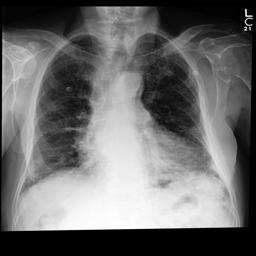

In [26]:
Image('/mnt/data/mimic-cxr-jpg/images-small/p10/p10083833/s59766637/8ad4512f-06c0b241-ef2e1e18-708c89ac-37ad8160.jpg')